# Feature Analysis

In [1]:
import pandas as pd
import math

In [2]:
#filenames1 = ['pionminus','pionminus1','pionminus2','pionminus3','pionminus4','pionminus5']
#filenames1 = ['ccbar0']
#filenames1 = ['ccbar0','phi0']
#filenames1 = ['ccbar_20M','phi0']
#filenames1 = ['phi_new00','ccbar_new00','bbbar_new00']#,
#filenames2 = ['photon_100M_v0','photon_100M_v1']
#filenames2 = ['photon_100M_new_v0','photon_100M_new_v1','photon_100M_new_v2']
#filenames2 = ['photon_new00','photon_new10','photon_new20','photon_new30','photon_new40','photon_new50']
filenames2 = ['dalitz_25M_v0']
filenames1 = ['bbbar_hits0','electron_hits0','positron_hits0']#,'ccbar_new00'
filenames1 = ['ccbar_hits0','electron_hits0','positron_hits0']#,'ccbar_new00'
filenames2 = ['photon_hits0','photon_hits1','photon_hits2','photon_hits3','photon_hits4','photon_hits5']
filenames2 = ['photon_new00','photon_new10','photon_new20','photon_new30','photon_new40','photon_new50','photon_new50']

dalitz = ['dalitz_new00']
dalitz = ['dalitz_new10']
do_dalitz = 0
do_conv = 1

filepath = "/home/yoren/bnl/PHENIX/ee/ML/"

hadron_weight = 100*120/48

In [3]:
if True:
    data = pd.read_csv(filepath+f'{filenames1[0]}.csv')
    for ifile in range(1,len(filenames1)):
        idata = pd.read_csv(filepath+f'{filenames1[ifile]}.csv')
        data = pd.concat([data,idata], sort=False)
    data.loc[data['IsTrue0'] > -99, 'IsTrue0'] = 1

    for ifile in range(0,len(filenames2)*do_conv):
        idata = pd.read_csv(filepath+f'{filenames2[ifile]}.csv')
        idata.loc[idata['IsTrue0'] > -99, 'IsTrue0'] = 0
        data = pd.concat([data,idata], sort=False)

    if do_dalitz:
        dalitzdata = pd.read_csv(filepath+f'{dalitz[0]}.csv')
        dalitzlen = int(dalitzdata.shape[0]*1.174e-2*6*50/25/5)
        if do_conv: dalitzdata = dalitzdata[:dalitzlen]
        dalitzdata.loc[dalitzdata['IsTrue0'] > -99, 'IsTrue0'] = 0
        data = pd.concat([data,dalitzdata], sort=False)

    data = data.sample(frac = 1)
    float_columns=('Pt', 'Phi0', 'The0', 'PhiDC', 'ZDC', 'Alpha', 'Ecore',\
                   'reconpt','reconphi0','reconthe0','px','py','pz','vx','vy','vz',\
                   'sdphi0','sdthe0','SecondHitPhiR0','SecondHitPhiL0','SecondHitTheR0','SecondHitTheL0','SecondHitPhiR01','SecondHitPhiL01','SecondHitTheR01','SecondHitTheL01',\
                   'sdphi1','sdthe1','SecondHitPhiR1','SecondHitPhiL1','SecondHitTheR1','SecondHitTheL1','SecondHitPhiR11','SecondHitPhiL11','SecondHitTheR11','SecondHitTheL11',\
                   'sdphi2','sdthe2','SecondHitPhiR2','SecondHitPhiL2','SecondHitTheR2','SecondHitTheL2','SecondHitPhiR21','SecondHitPhiL21','SecondHitTheR21','SecondHitTheL21',\
                   'sdphi3','sdthe3','SecondHitPhiR3','SecondHitPhiL3','SecondHitTheR3','SecondHitTheL3','SecondHitPhiR31','SecondHitPhiL31','SecondHitTheR31','SecondHitTheL31')
    int_columns=('NBDThit','Centrality', 'Charge', 'Arm','IsTrue0','IsTrue1','IsTrue2','IsTrue3')
    
    for float_column in float_columns:
        data[float_column] = data[float_column].astype('float16')
    for int_column in int_columns:
        data[int_column] = data[int_column].astype('int32')
        
    data = data[(data['Pt'] > 0.4) & (data['Pt'] < 4.4) & (data['Ecore'] > 0.1) & (data['Ecore'] < 25) & (data['reconthe0'] < 25) & (data['reconthe0'] < 25) & (data['reconpt'] < 999)  ]

    data['sdphi4'] = data['sdphi0'] - data['sdphi1']

    #data['The0'] = data['The0'].apply(lambda x: math.sqrt( (float) ( 1.+1./math.tan(x)/math.tan(x) ) )) 
    #data['Ecore'] = (data['Ecore']*data['The0']-data['reconpt']) / data['Ecore']
    data['reconpt'] = (data['Pt']-data['reconpt'])/data['Pt']
    #data['The0'] = data['The0'].apply(lambda x: math.sqrt( (float) ( 1.+1./math.tan(x)/math.tan(x) ) )) 
    #data['Ecore'] = data['Ecore']*data['The0']
    #data['Ecore1'] = data['Ecore']-data['reconpt']
    #data['Ecore2'] = data['Ecore1']/data['Ecore']
    #data['reconpt1'] = data['Pt']-data['reconpt']
    #data['reconpt2'] = data['reconpt1']/data['Pt']
    #data['reconphi0'] = (data['reconphi0'] - data['Phi0'])*data['Charge']

/home/yoren/.local/lib/python3.10/site-packages/pandas/core/dtypes/astype.py:133: RuntimeWarning: overflow encountered in cast
  return arr.astype(dtype, copy=True)


In [4]:
secondhitcolumns = ['SecondHitPhiR0','SecondHitPhiL0','SecondHitTheR0','SecondHitTheL0','SecondHitPhiR01','SecondHitPhiL01','SecondHitTheR01','SecondHitTheL01',\
                    'SecondHitPhiR1','SecondHitPhiL1','SecondHitTheR1','SecondHitTheL1','SecondHitPhiR11','SecondHitPhiL11','SecondHitTheR11','SecondHitTheL11',\
                    'SecondHitPhiR2','SecondHitPhiL2','SecondHitTheR2','SecondHitTheL2','SecondHitPhiR21','SecondHitPhiL21','SecondHitTheR21','SecondHitTheL21',\
                    'SecondHitPhiR3','SecondHitPhiL3','SecondHitTheR3','SecondHitTheL3','SecondHitPhiR31','SecondHitPhiL31','SecondHitTheR31','SecondHitTheL31']
for secondhitname in secondhitcolumns:
    data.loc[data[secondhitname] < -99, secondhitname] = -99
    data.loc[data[secondhitname] >  99, secondhitname] = -99

In [5]:
data.head()

NBDThit        Pt      Phi0      The0     PhiDC        ZDC     Alpha  \
3780930        3  0.456055  3.343750  1.337891  2.873047  50.250000  0.237671   
681121         4  0.877930  3.216797  1.522461  3.449219  10.710938 -0.114746   
324951         3  2.263672 -0.302002  1.857422 -0.395264 -65.000000  0.049652   
899773         7  0.472900 -0.142822  1.784180  0.307373 -45.906250 -0.228394   
1420463        3  0.409912  2.458984  1.792969  2.970703 -48.781250 -0.260498   

            Ecore  Centrality  Charge  ...  IsTrue3  SecondHitPhiR3  \
3780930  0.429688          40      -1  ...        0           -99.0   
681121   0.744141           3       1  ...        0           -99.0   
324951   2.515625          58      -1  ...        0           -99.0   
899773   0.544922          39       1  ...        0           -99.0   
1420463  0.437256          83       1  ...        0           -99.0   

         SecondHitPhiL3  SecondHitTheR3  SecondHitTheL3  SecondHitPhiR31  \
3780930           -99.0           -99.0           -99.0            -99.0   
681121            -99.0           -99.0           -99.0            -99.0   
324951            -99.0           -99.0           -99.0            -99.0   
899773            -99.0           -99.0           -99.0            -99.0   
1420463           -99.0           -99.0           -99.0            -99.0   

         SecondHitPhiL31  SecondHitTheR31  SecondHitTheL31    sdphi4  
3780930            -99.0            -99.0            -99.0  2.000000  
681121             -99.0            -99.0            -99.0 -4.832031  
324951             -99.0            -99.0            -99.0  0.252930  
899773             -99.0            -99.0            -99.0 -0.783203  
1420463            -99.0            -99.0            -99.0  1.483398  

[5 rows x 65 columns]

In [6]:
#data = data[11023232:]
print(data.size, data.shape)

691149550 (10633070, 65)


In [7]:
# удалим лишние колонки
data = data.drop(columns = ['IsTrue1','IsTrue2','IsTrue3','px','py','pz','vx','vy','vz','reconphi0','reconthe0','Phi0', 'The0', 'PhiDC', 'ZDC'])
#data = data.drop(columns = ['IsTrue1','IsTrue2','IsTrue3','px','py','pz','vx','vy','vz','sdphi1','sdphi2','sdphi3','sdthe0','sdthe1','sdthe2','sdthe3','reconphi0','reconthe0','Phi0', 'The0', 'PhiDC', 'ZDC'])
#data = data.drop(columns = ['IsTrue1','IsTrue2','IsTrue3','px','py','pz','vx','vy','vz','reconthe0','Phi0', 'The0', 'PhiDC', 'ZDC'])
data = data.drop(columns = ['Alpha','NBDThit', 'Arm', 'Charge'] )
#data = data.drop(columns=  ['SecondHitPhiR0','SecondHitPhiL0','SecondHitTheR0','SecondHitTheL0','SecondHitPhiR01','SecondHitPhiL01','SecondHitTheR01','SecondHitTheL01'])
#data = data.drop(columns=  ['SecondHitPhiR1','SecondHitPhiL1','SecondHitTheR1','SecondHitTheL1','SecondHitPhiR11','SecondHitPhiL11','SecondHitTheR11','SecondHitTheL11'])
#data = data.drop(columns=  ['SecondHitPhiR2','SecondHitPhiL2','SecondHitTheR2','SecondHitTheL2','SecondHitPhiR21','SecondHitPhiL21','SecondHitTheR21','SecondHitTheL21'])
#data = data.drop(columns=  ['SecondHitPhiR3','SecondHitPhiL3','SecondHitTheR3','SecondHitTheL3','SecondHitPhiR31','SecondHitPhiL31','SecondHitTheR31','SecondHitTheL31'])


In [8]:
import matplotlib.pyplot as plt

def analysis(data: pd.DataFrame):
    fig, ax = plt.subplots(4, 3, figsize=(15, 6))
    for i, feature in enumerate(['IsTrue0', 'Pt', 'SecondHitPhiR01', 'SecondHitPhiL01','SecondHitPhiR0','SecondHitPhiL0','SecondHitTheR0','SecondHitTheL0','SecondHitPhiR1','SecondHitPhiL1','SecondHitTheR1','SecondHitTheL1' ]):
        x, y = divmod(i, 3)
        data[feature].plot.hist(ax=ax[x][y], ylabel='', title=feature, color='skyblue', logy=True)


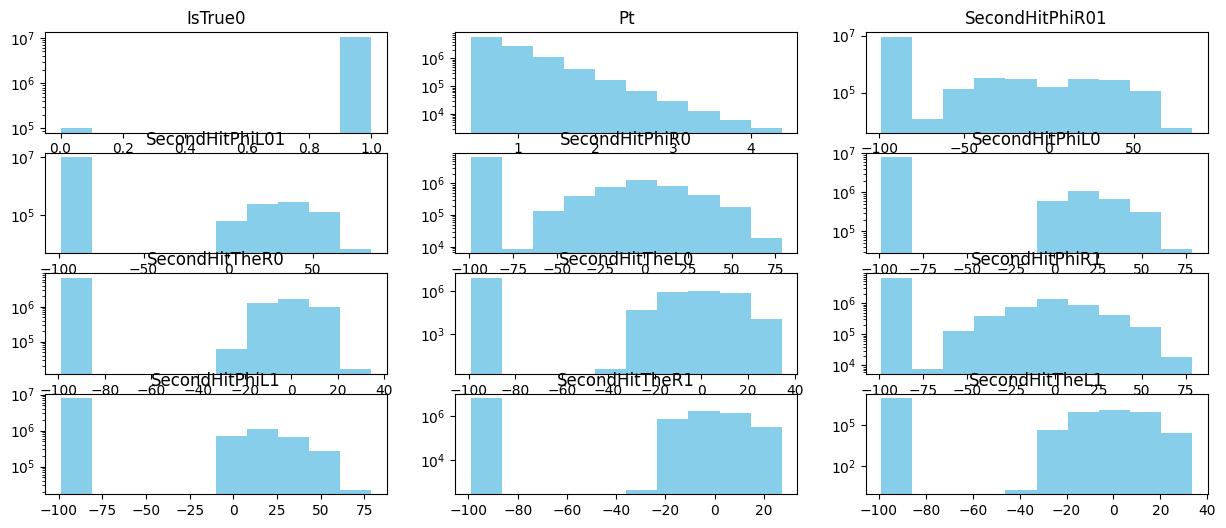

In [9]:
analysis(data)

+ Видим, что impressions имеют только одно значение, поэтому их можно удалить.
+ Таргет-переменная clicks сильно несбалансирована. Возможно, стоит использовать балансировку весов, а также в качестве оценки моделей использовать f1 и ROC AUC.
+ У campaign_clicks нулевых значений сильно больше, чем ненулевых, следовательно, можно трансформировать в бинарную фичу
+ os_id со значениями больше 6 встречается редко, можно объединить в одну категорию
+ Аналогично с редкими значениями zone_id

# Feature Engineering

In [10]:
def feature_engineering(data: pd.DataFrame) -> pd.DataFrame:
    # делим выборку на train и test
    #data = data.sort_values(by='date_time', ignore_index=True)
    #cut_off_val = data[data['date_time'] < pd.to_datetime('2021-10-01')].index[-1]
    #cut_off_test = data[data['date_time'] < pd.to_datetime('2021-10-02')].index[-1]

    cut_off_val =  int (data.shape[0]/2)
    cut_off_test = int (data.shape[0]/4*3 + 1)

    print(cut_off_val,cut_off_test)
    all_test = data[cut_off_test:]
    w_all = data['Pt']*(1-data['IsTrue0'])*hadron_weight + 1
    y = data['IsTrue0']
    data = data.drop(columns = ['IsTrue0'])
    data = data.drop(columns = ['Centrality','Pt','Ecore'])
    #data = data.drop(columns = ['sdphi0','sdphi1','sdphi2','sdphi3'])
    if do_conv:
        data = data.drop(columns = ['SecondHitPhiL0','SecondHitTheL0','SecondHitPhiL01','SecondHitTheL01'])
        data = data.drop(columns = ['SecondHitPhiL1','SecondHitTheL1','SecondHitPhiL11','SecondHitTheL11'])
        data = data.drop(columns = ['SecondHitPhiL2','SecondHitTheL2','SecondHitPhiL21','SecondHitTheL21'])
        data = data.drop(columns = ['SecondHitPhiL3','SecondHitTheL3','SecondHitPhiL31','SecondHitTheL31'])
        data = data.drop(columns = ['SecondHitPhiR0','SecondHitTheR0','SecondHitPhiR01','SecondHitTheR01'])
        data = data.drop(columns = ['SecondHitPhiR1','SecondHitTheR1','SecondHitPhiR11','SecondHitTheR11'])
        data = data.drop(columns = ['SecondHitPhiR2','SecondHitTheR2','SecondHitPhiR21','SecondHitTheR21'])
        data = data.drop(columns = ['SecondHitPhiR3','SecondHitTheR3','SecondHitPhiR31','SecondHitTheR31'])
        
    data_train, data_test = data[:cut_off_test], data[cut_off_test:]
    y_train, y_test = y.iloc[:cut_off_test], y.iloc[cut_off_test:]
    w_train, w_test = w_all[:cut_off_test], w_all[cut_off_test:] 
    
    # делаем one hot encodings
    #enc = OneHotEncoder(drop='first', handle_unknown='ignore')
    #enc.fit(data_train)
    #transformed_train = enc.transform(data_train)
    #transformed_test = enc.transform(data_test)
    
    return data_train, data_test, y_train, y_test, all_test, w_train, w_test

In [11]:
X_train_all, X_test, y_train_all, y_test, all_test, w_train, w_test = feature_engineering(data)

5316535 7974803


In [12]:
X_test

reconpt    sdphi0    sdthe0    sdphi1    sdthe1     sdphi2  \
436703  -0.329346  1.135742  0.161987 -0.445557 -0.000458   0.927734   
1256843 -0.094055 -2.169922 -0.360596 -0.988281  0.358643  -1.941406   
2572471  0.371826 -1.907227  1.432617  1.818359  3.150391   0.762207   
994     -0.085388 -0.219238 -1.498047 -0.214722  0.578125  -0.913574   
3657186  0.051941  1.250000 -0.226196  1.042969  0.601074 -10.000000   
...           ...       ...       ...       ...       ...        ...   
4219448 -0.221680  0.157227 -1.274414 -0.507324 -0.625000  -0.228394   
2445514  0.146240  0.554199  0.179565  1.043945  0.169189 -10.000000   
3110603  0.100769 -0.953613  0.101318 -0.013367 -0.603027 -10.000000   
3599938 -0.361816 -0.884277 -0.927734 -1.540039 -0.280273  -1.948242   
1755018 -0.073669 -1.615234 -0.270996 -0.749512  1.080078 -10.000000   

            sdthe2     sdphi3     sdthe3    sdphi4  
436703    1.033203 -10.000000 -10.000000  1.581055  
1256843  -0.229370 -10.000000 -10.000000 -1.181641  
2572471   1.511719  -0.147339  -0.362305 -3.726562  
994       0.676270  -1.992188  -0.031494 -0.004517  
3657186 -10.000000   0.328369  -0.209839  0.207031  
...            ...        ...        ...       ...  
4219448   0.107910   2.007812   0.037994  0.664551  
2445514 -10.000000   2.404297  -1.370117 -0.489746  
3110603 -10.000000   2.314453  -3.542969 -0.940430  
3599938  -1.003906  -0.406738  -0.425049  0.655762  
1755018 -10.000000  -1.291992   0.184326 -0.865723  

[2658267 rows x 10 columns]

In [13]:
X_train = X_train_all
y_train = y_train_all
if False:
    w_train = y_train-1
    w_test = y_test-1
    w_train_all = y_train_all - 1
    w_train = w_train*(-hadron_weight)+1
    w_test = w_test*(-hadron_weight)+1
    w_train_all = w_train_all*(-hadron_weight)+1

+ Увидели, что количество кликов меняется в зависимости от дня недели и часа, добавим в качестве фичей
+ Также, добавим интеракции между этими двумя переменными, так как в разные дни недели разные часы могут по-разному влиять на колличество кликов
+ banner_id удалила, так как предполагаю, что модель должна уметь предсказывать клики для новых баннеров тоже.
+ Так как все оставшиеся фичи являются категориальными, сделали one-hot-encoding


+ В качестве теста берем последний день датасета, в качестве валидации -- предпоследний

# Create Model

In [14]:
from sklearn import metrics
from sklearn.ensemble import GradientBoostingClassifier
gb_clf = GradientBoostingClassifier(n_estimators=4, learning_rate= 0.1, max_features=2, max_depth=2, random_state=0)
gb_clf.fit(X_train, y_train, w_train)

predicted = gb_clf.predict(X_test)

# calculating the main quality metrics
print(metrics.classification_report(y_test, predicted))

print('confusion matrix')
print(metrics.confusion_matrix(y_test, predicted))

/home/yoren/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/yoren/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


              precision    recall  f1-score   support

           0       0.01      1.00      0.02     25437
           1       0.00      0.00      0.00   2632830

    accuracy                           0.01   2658267
   macro avg       0.00      0.50      0.01   2658267
weighted avg       0.00      0.01      0.00   2658267

confusion matrix
[[  25437       0]
 [2632830       0]]


/home/yoren/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [15]:
# search for parameters
# https://www.kaggle.com/hatone/gradientboostingclassifier-with-gridsearchcv
import time
from sklearn.model_selection import GridSearchCV

start = time.time() 

parameters = {
    "loss":["log_loss"],
    "learning_rate": [0.2],
    "min_samples_split": [0.001],
    "max_depth":[12],
    "max_features":["sqrt"],
    "criterion": ['squared_error'],
    "n_estimators":[12]
    }

classif = GradientBoostingClassifier()
classif.set_params(init='zero')

clf = GridSearchCV(classif, parameters, cv=3, n_jobs=8)
clf.fit(X_train, y_train, sample_weight=w_train)
print('точность: ', clf.score(X_test, y_test))

# getting the best parameters ans score
print(clf.best_params_)
print(clf.best_score_)

stop = time.time()    
print('time of execution (sec)', stop - start)

точность:  0.7184756083568731
{'criterion': 'squared_error', 'learning_rate': 0.2, 'loss': 'log_loss', 'max_depth': 12, 'max_features': 'sqrt', 'min_samples_split': 0.001, 'n_estimators': 12}
0.7310406284372385
time of execution (sec) 576.0014839172363


# Cross Validation

In [16]:
predicted = clf.predict(X_test)
print(metrics.classification_report(y_test, predicted))

              precision    recall  f1-score   support

           0       0.03      0.85      0.05     25437
           1       1.00      0.72      0.83   2632830

    accuracy                           0.72   2658267
   macro avg       0.51      0.79      0.44   2658267
weighted avg       0.99      0.72      0.83   2658267



In [17]:
y_pred_probs = clf.predict_proba(X_test)
y_pred = clf.predict(X_test)

# Model Evaluation

log loss: 0.45914619184339955
roc auc: 0.864304465078751
f1 score: 0.8881515229421211


Text(0.5, 1.0, 'ROC AUC Curve')

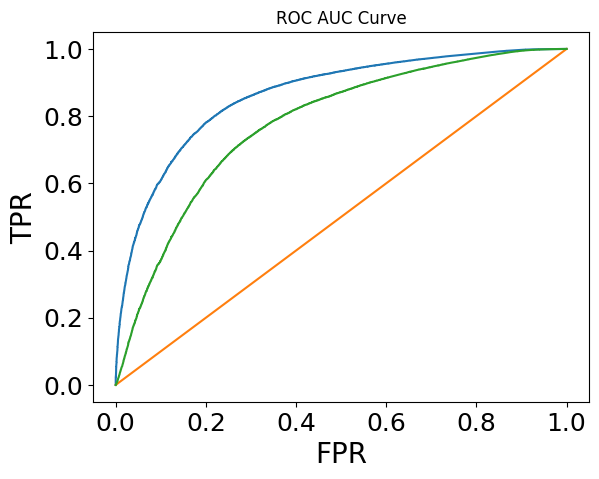

In [18]:
import numpy as np
from sklearn import metrics
from sklearn.metrics import roc_auc_score, log_loss, f1_score

print('log loss:', log_loss(y_test, y_pred_probs, sample_weight=w_test))

fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_probs[:, 1], pos_label=1, sample_weight=w_test)
metrics.auc(fpr, tpr)
print('roc auc:', metrics.auc(fpr, tpr))

optimal_idx = np.argmax(tpr - fpr)
optimal_threshold = thresholds[optimal_idx]
y_pred_opt = y_pred_probs[:, 1] > optimal_threshold
print('f1 score:', f1_score(y_test, y_pred_opt))
tpr2 = tpr*tpr
plt.plot(fpr, tpr)
plt.plot(fpr, fpr)
plt.plot(fpr, tpr2)
plt.xlabel("FPR", fontsize=20)
plt.ylabel("TPR", fontsize=20)
plt.xticks(fontsize = 18) 
plt.yticks(fontsize = 18) 
plt.title('ROC AUC Curve')

In [19]:
pred_baseline = np.ones_like(y_test) * y_test.mean()
print("baseline auc:", roc_auc_score(y_test, pred_baseline))
print("baseline log_loss:", log_loss(y_test, pred_baseline))

baseline auc: 0.5
baseline log_loss: 0.054011594638394764


In [103]:
i = 290000
print(round(tpr[i],3),round(fpr[i]/tpr[i]/tpr[i],4))
print(round(tpr[i],3),round(fpr[i]/tpr[i],4))
print(thresholds[i],fpr[i],tpr[i])
#print((fpr[i]/tpr[i]*data1.shape[0]/data2.shape[0]/10)**-1,(fpr[i]/1.*data1.shape[0]/data2.shape[0]/10)**-1)

0.606 0.2687
0.606 0.1627
0.5946448629798124 0.09852154605923898 0.6055480224701177


In [104]:
print(sum(predicted),len(predicted))

1891885 2658267


In [105]:
kek_data = data
kek_data = kek_data.drop(columns = ['IsTrue0'])
kek_data = kek_data.drop(columns = ['Centrality','Pt','Ecore'])
if do_conv:
    kek_data = kek_data.drop(columns = ['SecondHitPhiL0','SecondHitTheL0','SecondHitPhiL01','SecondHitTheL01'])
    kek_data = kek_data.drop(columns = ['SecondHitPhiL1','SecondHitTheL1','SecondHitPhiL11','SecondHitTheL11'])
    kek_data = kek_data.drop(columns = ['SecondHitPhiL2','SecondHitTheL2','SecondHitPhiL21','SecondHitTheL21'])
    kek_data = kek_data.drop(columns = ['SecondHitPhiL3','SecondHitTheL3','SecondHitPhiL31','SecondHitTheL31'])
    kek_data = kek_data.drop(columns = ['SecondHitPhiR0','SecondHitTheR0','SecondHitPhiR01','SecondHitTheR01'])
    kek_data = kek_data.drop(columns = ['SecondHitPhiR1','SecondHitTheR1','SecondHitPhiR11','SecondHitTheR11'])
    kek_data = kek_data.drop(columns = ['SecondHitPhiR2','SecondHitTheR2','SecondHitPhiR21','SecondHitTheR21'])
    kek_data = kek_data.drop(columns = ['SecondHitPhiR3','SecondHitTheR3','SecondHitPhiR31','SecondHitTheR31'])
proba_loc = clf.predict_proba(kek_data)
print(proba_loc[0][1])

0.49854244259749764


In [106]:
import ROOT as root
outfile = root.TFile.Open("output/BDT_Conv.root", "recreate")
e_pt_hist_AI = root.TH2D("e_pt_hist_AI", "e_pt_hist_AI", 50, 0, 5, 10, 0, 100)
h_pt_hist_AI = root.TH2D("h_pt_hist_AI", "h_pt_hist_AI", 50, 0, 5, 10, 0, 100)
e_pt_hist_SC = root.TH2D("e_pt_hist_SC", "e_pt_hist_SC", 50, 0, 5, 10, 0, 100)
h_pt_hist_SC = root.TH2D("h_pt_hist_SC", "h_pt_hist_SC", 50, 0, 5, 10, 0, 100)
e_pt_hist_NC = root.TH2D("e_pt_hist_NC", "e_pt_hist_NC", 50, 0, 5, 10, 0, 100)
h_pt_hist_NC = root.TH2D("h_pt_hist_NC", "h_pt_hist_NC", 50, 0, 5, 10, 0, 100)

In [107]:
mycute,mycuth, AIcute, AIcuth = 0.1, 0.1, 0.1, 0.1
norm_e, norm_h = 0.1, 0.1
data0 = data.reset_index()  # make sure indexes pair with number of rows

sigma, sigma_veto = 3, -2

pt = 0.
pt_prev = 0.
IsTrue0_prev = 1
IsTrue0 = 1
counter =-1
cont = 1
myml = 1
myml_now = 1
centrality, centralitynow = 0, 0
SecondHitPhiL0, SecondHitPhiL1, SecondHitPhiL2, SecondHitPhiL3 = 0,0,0,0
pSecondHitPhiL0, pSecondHitPhiL1, pSecondHitPhiL2, pSecondHitPhiL3 = 0,0,0,0
SecondHitTheL0, SecondHitTheL1, SecondHitTheL2, SecondHitTheL3 = 0,0,0,0
pSecondHitTheL0, pSecondHitTheL1, pSecondHitTheL2, pSecondHitTheL3 = 0,0,0,0
for index, row in data0.iterrows():
    counter+=1
    if counter>400000: break
    SecondHitPhiL0loc, SecondHitPhiL1loc, SecondHitPhiL2loc, SecondHitPhiL3loc = row['SecondHitPhiL0'], row['SecondHitPhiL1'], row['SecondHitPhiL2'], row['SecondHitPhiL3']
    SecondHitTheL0loc, SecondHitTheL1loc, SecondHitTheL2loc, SecondHitTheL3loc = row['SecondHitTheL0'], row['SecondHitTheL1'], row['SecondHitTheL2'], row['SecondHitTheL3']
    sdthe0, sdthe1, sdthe2, sdthe3 = 0, 0, 0, 0
    centralityloc, ptloc, IsTrue0loc = row['Centrality'], row['Pt'], row['IsTrue0']
    if abs(pt -  ptloc) < 1e-6: 
        cont = 0
        myml_now*=proba_loc[counter][1]>thresholds[i]
    else: 
        pt_prev = pt
        pt = ptloc
        centrality = centralitynow
        centralitynow = centralityloc
        SecondHitPhiL0, SecondHitPhiL1, SecondHitPhiL2, SecondHitPhiL3 = pSecondHitPhiL0, pSecondHitPhiL1, pSecondHitPhiL2, pSecondHitPhiL3 
        pSecondHitPhiL0, pSecondHitPhiL1, pSecondHitPhiL2, pSecondHitPhiL3 = SecondHitPhiL0loc, SecondHitPhiL1loc, SecondHitPhiL2loc, SecondHitPhiL3loc
        SecondHitTheL0, SecondHitTheL1, SecondHitTheL2, SecondHitTheL3 = pSecondHitTheL0, pSecondHitTheL1, pSecondHitTheL2, pSecondHitTheL3 
        pSecondHitTheL0, pSecondHitTheL1, pSecondHitTheL2, pSecondHitTheL3 = SecondHitTheL0loc, SecondHitTheL1loc, SecondHitTheL2loc, SecondHitTheL3loc 
        IsTrue0 = IsTrue0_prev
        IsTrue0_prev = IsTrue0loc
        myml = myml_now
        myml_now = proba_loc[counter][1]>thresholds[i]
        cont = 1

    if not cont: continue
    if pt_prev<0.4 or centrality<0: continue
    
    if IsTrue0: e_pt_hist_NC.Fill(pt_prev,centrality)
    else:    h_pt_hist_NC.Fill(pt_prev,centrality)
    if not ( (SecondHitPhiL1>0 and SecondHitPhiL1<12.5 and abs(SecondHitTheL1)<12.5) \
            or (SecondHitPhiL2>0 and SecondHitPhiL2<25 and abs(SecondHitTheL2)<12.5) \
            or (SecondHitPhiL3>0 and SecondHitPhiL3<25 and abs(SecondHitTheL3)<12.5) ):
        if IsTrue0: 
            mycute+=1
            e_pt_hist_SC.Fill(pt_prev,centrality)
        else: 
            mycuth+=1+hadron_weight
            h_pt_hist_SC.Fill(pt_prev,centrality)
    if myml: 
        if IsTrue0: 
            AIcute+=1
            e_pt_hist_AI.Fill(pt_prev,centrality)
        else: 
            AIcuth+=1+hadron_weight
            h_pt_hist_AI.Fill(pt_prev,centrality)
    if IsTrue0: norm_e+=1
    else: norm_h+=1+hadron_weight
    #if counter<10: 
    #    print(proba_loc[counter],answer(centrality,pt,ep,n0,disp,chi2,npe0,prob))
        #print(centrality, pt, ep, n0, disp, chi2, npe0, prob, phi0 )

In [108]:
print(norm_e, norm_h,round(mycute/norm_e,3),round(mycuth/norm_h,3), round(AIcute/norm_e,3), round(AIcuth/norm_h,3), round(AIcuth/AIcute/norm_h*norm_e,3),round(fpr[i]/tpr[i],3))

396011.1 953800.1 0.728 0.48 0.606 0.072 0.118 0.163


In [109]:
print(round(AIcute/mycute/(AIcuth/mycuth),3),round(AIcute/mycute,3),round(AIcuth/mycuth,3), round(30*AIcute/norm_e/AIcuth*norm_h))

5.576 0.832 0.149 254


In [110]:
%run input/Format.ipynb
%jsroot on

/home/yoren/.local/lib/python3.10/site-packages/nbformat/__init__.py:96: MissingIDFieldWarning: Cell is missing an id field, this will become a hard error in future nbformat versions. You may want to use `normalize()` on your notebooks before validations (available since nbformat 5.1.4). Previous versions of nbformat are fixing this issue transparently, and will stop doing so in the future.
  validate(nb)


In [111]:
c1 = root.TCanvas("c1","c1",1400,2500)
c1.Divide(2,5)
part_names_legend= [ "prompt e^{-} " , "#gamma#rightarrow e^{-} "]
centralities_legend = ["0-20%","20-40%","40-60%","60-80%","80-93%"]
legends = []
for icentr in range(5):

    c1.cd(1+2*icentr)
    root.gPad.SetLogy()
    e_pt_hist_NC.ProjectionX(f"e_pt_hist_NC_{icentr}").SetLineWidth(312)
    e_pt_hist_SC.ProjectionX(f"e_pt_hist_SC_{icentr}").SetLineWidth(3)
    e_pt_hist_AI.ProjectionX(f"e_pt_hist_AI_{icentr}").SetLineWidth(3)
    e_pt_hist_NC.SetLineColor(4)
    e_pt_hist_SC.SetLineColor(2)
    e_pt_hist_AI.SetLineColor(1)
    proj = e_pt_hist_NC.ProjectionX(f"e_pt_hist_NC_{icentr}",2*icentr+1,2*icentr+2)
    proj.SetMinimum(2)
    Format_Hist_total(proj, title_x="p_{T} [GeV]",  title_y="dN/dp_{T}", left=0.15, bottom=0.15, right=0.01, top=0.01,  Tsize=0.07,  Lsize=0.06,\
                      Mstyle=21,  Msize=2, Mcolor=4,  Lwidth=3,  Lcolor=4,  offset_x=1, offset_y=1, title="",  Malpha=1,  Lalpha=1)
    proj.Draw()
    phoj_s = e_pt_hist_SC.ProjectionX(f"e_pt_hist_SC_{icentr}",2*icentr+1,2*icentr+2)
    phoj_s.Draw("same")
    e_pt_hist_AI.ProjectionX(f"e_pt_hist_AI_{icentr}",2*icentr+1,2*icentr+2).Draw("same")

    legends.append(Draw_Legend_Title(0.65,0.65,0.95,0.95,part_names_legend[0]+centralities_legend[icentr],TextSize=0.08, align =22, LineWidth=0, Color=1,  alpha=0))
    legends[-1].AddEntry(phoj_s,"std","l")
    legends[-1].AddEntry(e_pt_hist_AI.ProjectionX(f"e_pt_hist_AI_{icentr}",2*icentr+1,2*icentr+2),"bdt","l")
    legends[-1].Draw()

    c1.cd(2+2*icentr)
    root.gPad.SetLogy()
    h_pt_hist_NC.ProjectionX(f"h_pt_hist_NC_{icentr}").SetLineWidth(3)
    h_pt_hist_SC.ProjectionX(f"h_pt_hist_SC_{icentr}").SetLineWidth(3)
    h_pt_hist_AI.ProjectionX(f"h_pt_hist_AI_{icentr}").SetLineWidth(3)
    h_pt_hist_NC.SetLineColor(4)
    h_pt_hist_SC.SetLineColor(2)
    h_pt_hist_AI.SetLineColor(1)
    projh = h_pt_hist_NC.ProjectionX(f"h_pt_hist_NC_{icentr}",2*icentr+1,2*icentr+2)
    Format_Hist_total(projh, title_x="p_{T} [GeV]",  title_y="dN/dp_{T}", left=0.15, bottom=0.15, right=0.01, top=0.01,  Tsize=0.07,  Lsize=0.06,\
                      Mstyle=21,  Msize=2, Mcolor=4,  Lwidth=3,  Lcolor=4,  offset_x=1, offset_y=1, title="",  Malpha=1,  Lalpha=1)
    projh.SetMinimum(2)
    projh.Draw()
    phoj_sd = h_pt_hist_SC.ProjectionX(f"h_pt_hist_SC_{icentr}",2*icentr+1,2*icentr+2)
    phoj_sd.Draw("same")
    h_pt_hist_AI.ProjectionX(f"h_pt_hist_AI_{icentr}",2*icentr+1,2*icentr+2).Draw("same")

    legends.append(Draw_Legend_Title(0.7,0.65,0.95,0.95,part_names_legend[1]+centralities_legend[icentr],TextSize=0.08, align =22, LineWidth=0, Color=1,  alpha=0))
    legends[-1].AddEntry(phoj_sd,"std","l")
    legends[-1].AddEntry(h_pt_hist_AI.ProjectionX(f"h_pt_hist_AI_{icentr}",2*icentr+1,2*icentr+2),"bdt","l")
    legends[-1].Draw()
c1.Draw()
print(h_pt_hist_NC.GetBinContent(10,1),e_pt_hist_NC.GetBinContent(10,1))
c1.SaveAs("output/BDT_Conv.png")

10.0 2046.0


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c1
Info in <TCanvas::Print>: png file output/BDT_Conv.png has been created


In [112]:
if False:
    e_pt_hist_AI.Write()
    h_pt_hist_AI.Write()
    e_pt_hist_SC.Write()
    h_pt_hist_SC.Write()
    e_pt_hist_NC.Write()
    h_pt_hist_NC.Write()
    outfile.Close()

In [113]:
import pickle
with open('output/bdt_conv.pkl','wb') as f:
    pickle.dump(clf,f)

print(clf.predict(kek_data[0:10]))

[0 1 1 1 1 1 0 1 1 1]


In [114]:
import pickle
# load
with open('output/bdt_conv.pkl', 'rb') as f:
    clf2 = pickle.load(f)
print(clf2.predict(kek_data[0:10]))

[0 1 1 1 1 1 0 1 1 1]


dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.726783 to fit



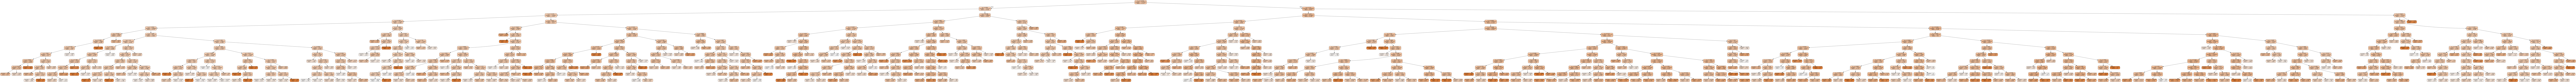

In [115]:
sub_tree_42 = clf2.best_estimator_[0, 0]
from sklearn.tree import export_graphviz, export_text
from sklearn.tree import _tree
# Visualization
# Install graphviz: https://www.graphviz.org/download/
from pydotplus import graph_from_dot_data
from IPython.display import Image
dot_data = export_graphviz(
    sub_tree_42,
    out_file=None, filled=True, rounded=True,
    special_characters=True,
    proportion=False, impurity=False, # enable them if you want
)

graph = graph_from_dot_data(dot_data)
png = graph.create_png()
# Save (optional)
from pathlib import Path
Path('output/out.png').write_bytes(png)
# Display
Image(png)

In [116]:
clf2.predict(kek_data[0:100])

array([0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0,
       1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1], dtype=int32)

In [117]:
clf2.predict_proba(kek_data[0:100])

array([[0.50145756, 0.49854244],
       [0.29342784, 0.70657216],
       [0.39201794, 0.60798206],
       [0.42052653, 0.57947347],
       [0.25902695, 0.74097305],
       [0.47386416, 0.52613584],
       [0.51207471, 0.48792529],
       [0.17185758, 0.82814242],
       [0.17665797, 0.82334203],
       [0.28231171, 0.71768829],
       [0.52040199, 0.47959801],
       [0.14059442, 0.85940558],
       [0.61909498, 0.38090502],
       [0.38488023, 0.61511977],
       [0.243009  , 0.756991  ],
       [0.2166936 , 0.7833064 ],
       [0.12820639, 0.87179361],
       [0.2025842 , 0.7974158 ],
       [0.33231994, 0.66768006],
       [0.20316307, 0.79683693],
       [0.22996992, 0.77003008],
       [0.44298522, 0.55701478],
       [0.79724563, 0.20275437],
       [0.22868985, 0.77131015],
       [0.2383436 , 0.7616564 ],
       [0.32046074, 0.67953926],
       [0.55312216, 0.44687784],
       [0.18508418, 0.81491582],
       [0.24650723, 0.75349277],
       [0.33459948, 0.66540052],
       [0.

In [118]:
print( clf2.best_params_)

{'criterion': 'squared_error', 'learning_rate': 0.2, 'loss': 'log_loss', 'max_depth': 12, 'max_features': 'sqrt', 'min_samples_split': 0.001, 'n_estimators': 12}


In [119]:
clf2.best_estimator_.predict_proba(kek_data[9:20])

array([[0.28231171, 0.71768829],
       [0.52040199, 0.47959801],
       [0.14059442, 0.85940558],
       [0.61909498, 0.38090502],
       [0.38488023, 0.61511977],
       [0.243009  , 0.756991  ],
       [0.2166936 , 0.7833064 ],
       [0.12820639, 0.87179361],
       [0.2025842 , 0.7974158 ],
       [0.33231994, 0.66768006],
       [0.20316307, 0.79683693]])

In [120]:
y = clf2.best_estimator_[0, 0].predict(kek_data[9:19].values.tolist())*0
#y = gb_clf.decision_function(kek_data[9:20])

rate = clf2.best_params_['learning_rate']
print(rate)
for i in range(0,10):
    sub_tree = clf2.best_estimator_[i, 0]
    y += rate*sub_tree.predict(kek_data[9:19].values.tolist())
print(y)
print(gb_clf.decision_function(kek_data[9:20]))
z=y
for i in range(len(z)): 
    z[i] = 1./(1+np.exp(-z[i]))
print(z)

0.2
[ 0.87493419 -0.46574286  1.46867611 -0.46999279  0.29741339  1.07816352
  1.25271897  1.58009169  1.28978487  0.52827165]
[-0.27550987 -0.44096393 -0.27550987 -0.46467826 -0.44096393 -0.32255638
 -0.32255638 -0.27550987 -0.35459837 -0.41790713 -0.27550987]
[0.70577136 0.38562435 0.81285608 0.38461795 0.57381008 0.74614629
 0.77777017 0.8292175  0.78411077 0.62907991]


In [121]:
best_gbc = clf2.best_estimator_

In [122]:
n_estim = best_gbc.n_estimators

In [123]:
learning_rate = best_gbc.learning_rate
print(clf2.decision_function(kek_data[9:19]))
arr = clf2.decision_function(kek_data[9:19])
print(1./(1.+np.exp(-arr)))
#tree_scores = [best_gbc.estimators_[i, 0].decision_function(kek_data[9:19].values.tolist()) for i in range(10)]
print(learning_rate)

[ 0.93302354 -0.08165331  1.81036166 -0.48570863  0.46888482  1.13625287
  1.28503958  1.91691136  1.37022065  0.69771092]
[0.71768829 0.47959801 0.85940558 0.38090502 0.61511977 0.756991
 0.7833064  0.87179361 0.7974158  0.66768006]
0.2


In [124]:
log_odds_predictions = []
for tree in clf2.best_estimator_:
    # For each tree, get the predicted values for each sample
    leaf_indices = tree[0].apply(kek_data[9:19].values.tolist())  # Get the leaf indices for the training data
    leaf_values = tree[0].tree_.value  # Get the values at each leaf

    # Average the values for each leaf to interpret them as log odds
    predicted_log_odds = [leaf_values[leaf_indices[i]].mean() for i in range(len(kek_data[9:19]))]
    log_odds_predictions.append(predicted_log_odds)

In [125]:
print(log_odds_predictions)

[[0.9494723057318465, -0.5490906703403903, 1.3181363430644266, -0.9762530540729257, 0.47289132079094987, 1.1261150008067335, 1.1261150008067335, 1.1409018596971998, 1.3181363430644266, 0.580681880643794], [0.41731442067128466, -0.18484563251227773, 1.2684719967503606, -1.0113473822910692, -0.18484563251227773, 0.6588721912308275, 0.6588721912308275, 1.264455400115489, 1.1858614753945647, 0.5232615181811988], [0.6453954796365586, 0.32756969655153345, 0.7514807447189741, -0.7946680140833984, 0.32756969655153345, 0.7514807447189741, 1.0246051187869147, 0.7514807447189741, 0.7514807447189741, 0.8076269215740097], [0.31651940676285034, -0.7815857391017346, 0.771297603056147, -0.7815857391017346, 0.7745240765093491, 0.771297603056147, 0.771297603056147, 0.771297603056147, 0.771297603056147, 0.19074098477396462], [0.3425058771816016, -0.347627538930165, 0.7103341122629437, -0.5494300424177635, 0.06372054042739506, 0.3425058771816016, 0.3425058771816016, 1.4491859944851422, 0.7103341122629437,

In [126]:
rate = clf2.best_params_['learning_rate']
myarr = [log_odds_predictions[i][0] for i in range(10)]
print(rate,rate*sum(myarr))
print(clf2.decision_function(kek_data[9:19]))

0.2 0.8749341923570576
[ 0.93302354 -0.08165331  1.81036166 -0.48570863  0.46888482  1.13625287
  1.28503958  1.91691136  1.37022065  0.69771092]


In [127]:
print(best_gbc.estimators_.shape[0])
print(best_gbc.estimators_.shape[1])
y = []
for i in range(10):
    y0=[]
    for j in range(n_estim):
        sub_tree = clf2.best_estimator_[j, 0]
        y0.append(sub_tree.predict(kek_data[9+i:10+i].values.tolist())[0])
    y.append(y0)
print(y)

12
1
[[0.9494723057318465, 0.41731442067128466, 0.6453954796365586, 0.31651940676285034, 0.3425058771816016, 0.41507927123110644, 0.4784612384619055, 0.2761277306743697, 0.3513686369962716, 0.1824265944374925, 0.25007601845096383, 0.040370725879706575], [-0.5490906703403903, -0.18484563251227773, 0.32756969655153345, -0.7815857391017346, -0.347627538930165, -0.5571606124966411, -0.17743299470208354, 0.06956098084941587, -0.1761966465357375, 0.04809487297019632, 0.1312920575973051, 1.789155683227347], [1.3181363430644266, 1.2684719967503606, 0.7514807447189741, 0.771297603056147, 0.7103341122629437, 0.41507927123110644, 0.4784612384619055, 0.5730440731645559, 0.3513686369962716, 0.7057065178435783, 0.5326504706620396, 1.1757772871949308], [-0.9762530540729257, -1.0113473822910692, -0.7946680140833984, -0.7815857391017346, -0.5494300424177635, 2.9145947065310973, -0.5027209154061261, 0.30168812142469276, -0.3955081939103211, -0.5547334588592097, 0.23936090853080583, -0.3179400788801106],

In [128]:
def get_rules(tree, feature_names, class_names):
    tree_ = tree.tree_
    feature_name = [
        #feature_names[i] if i != _tree.TREE_UNDEFINED else "undefined!"
        f'x[{i}]' if i != _tree.TREE_UNDEFINED else "undefined!"
        for i in tree_.feature
    ]

    paths = []
    path = []
    
    def recurse(node, path, paths):
        
        if tree_.feature[node] != _tree.TREE_UNDEFINED:
            name = feature_name[node]
            threshold = tree_.threshold[node]
            p1, p2 = list(path), list(path)
            p1 += [f"({name} <= {np.round(threshold, 5)})"]
            recurse(tree_.children_left[node], p1, paths)
            p2 += [f"({name} > {np.round(threshold, 5)})"]
            recurse(tree_.children_right[node], p2, paths)
        else:
            path += [(tree_.value[node], tree_.n_node_samples[node])]
            paths += [path]
            
    recurse(0, path, paths)

    # sort by samples count
    samples_count = [p[-1][1] for p in paths]
    ii = list(np.argsort(samples_count))
    paths = [paths[i] for i in reversed(ii)]
    
    rules = []
    for path in paths:
        rule = "if ( "
        
        for p in path[:-1]:
            if rule != "if ( ":
                rule += " && "
            rule += str(p)
        rule += " ) "
        if class_names is None:
            rule += " return "+str(np.round(path[-1][0][0][0],30))
        else:
            classes = path[-1][0][0]
            l = np.argmax(classes)
            rule += f"class: {class_names[l]} (proba: {np.round(100.0*classes[l]/np.sum(classes),20)}%)"
        rule += f";  // | based on {path[-1][1]:,} samples"
        rules += [rule]
        
    return rules


In [129]:
import numpy as np
from sklearn.tree import _tree
def get_rules(tree, feature_names, class_names):
    tree_ = tree.tree_
    feature_name = [
        #feature_names[i] if i != _tree.TREE_UNDEFINED else "undefined!"
        f'x[{i}]' if i != _tree.TREE_UNDEFINED else "undefined!"
        for i in tree_.feature
    ]

    paths = []
    path = []
    
    def recurse(node, path, paths):
        
        if tree_.feature[node] != _tree.TREE_UNDEFINED:
            name = feature_name[node]
            threshold = tree_.threshold[node]
            p1, p2 = list(path), list(path)
            p1 += [f"({name} <= {threshold})"]
            recurse(tree_.children_left[node], p1, paths)
            p2 += [f"({name} > {threshold})"]
            recurse(tree_.children_right[node], p2, paths)
        else:
            path += [(tree_.value[node], tree_.n_node_samples[node])]
            paths += [path]
            
    recurse(0, path, paths)

    # sort by samples count
    samples_count = [p[-1][1] for p in paths]
    ii = list(np.argsort(samples_count))
    paths = [paths[i] for i in reversed(ii)]
    
    rules = []
    for path in paths:
        rule = "if  "
        
        for p in path[:-1]:
            if rule != "if  ":
                rule += " if "
            rule += str(p)
        rule += "  "
        if class_names is None:
            rule += " return "+str(np.round(path[-1][0][0][0],30))
        else:
            classes = path[-1][0][0]
            l = np.argmax(classes)
            rule += f"class: {class_names[l]} (proba: {np.round(100.0*classes[l]/np.sum(classes),20)}%)"
        rule += f";  // | based on {path[-1][1]:,} samples"
        rules += [rule]
        
    return rules

In [130]:
#print(f"double mytree{list(kek_data.columns)}")
print('{')
for iestim in range(n_estim):
    print(f"    if (iestim == {iestim})")
    print('    {')
    sub_tree = clf2.best_estimator_[iestim, 0]
    rules = get_rules(sub_tree, list(kek_data.columns), None)
    for r in rules:
        print("       ",r)
    print('    }')
print ('    return -9999;')
print('};')

{
    if (iestim == 0)
    {
        if  (x[1] > -0.778564453125) if (x[9] <= 2.1298828125) if (x[9] > -1.64697265625) if (x[3] > 0.0490264892578125) if (x[1] > -0.3416748046875) if (x[3] <= 1.87939453125) if (x[2] > -3.6201171875) if (x[5] <= 2.5849609375) if (x[9] <= 1.41650390625) if (x[1] > -0.16070556640625) if (x[5] > -0.819580078125) if (x[4] > -2.9423828125)   return 1.3181363430644266;  // | based on 1,195,727 samples
        if  (x[1] > -0.778564453125) if (x[9] <= 2.1298828125) if (x[9] > -1.64697265625) if (x[3] > 0.0490264892578125) if (x[1] > -0.3416748046875) if (x[3] <= 1.87939453125) if (x[2] > -3.6201171875) if (x[5] <= 2.5849609375) if (x[9] <= 1.41650390625) if (x[1] > -0.16070556640625) if (x[5] <= -0.819580078125) if (x[1] <= 1.63427734375)   return 1.1261150008067335;  // | based on 959,040 samples
        if  (x[1] > -0.778564453125) if (x[9] <= 2.1298828125) if (x[9] > -1.64697265625) if (x[3] <= 0.0490264892578125) if (x[1] > -0.2955322265625) if (x[2] <= 2.11

In [131]:
def get_rules(tree, feature_names, class_names):
    tree_ = tree.tree_
    feature_name = [
        f'x[{i}]' if i != _tree.TREE_UNDEFINED else "undefined!"
        for i in tree_.feature
    ]

    paths = []
    path = []
    
    def recurse(node, path, paths):
        
        if tree_.feature[node] != _tree.TREE_UNDEFINED:
            name = feature_name[node]
            threshold = tree_.threshold[node]
            p1, p2 = list(path), list(path)
            p1 += [f"({name} <= {threshold})"]
            recurse(tree_.children_left[node], p1, paths)
            p2 += [f"({name} > {threshold})"]
            recurse(tree_.children_right[node], p2, paths)
        else:
            path += [(tree_.value[node], tree_.n_node_samples[node])]
            paths += [path]
            
    recurse(0, path, paths)

    # sort by samples count
    samples_count = [p[-1][1] for p in paths]
    ii = list(np.argsort(samples_count))
    paths = [paths[i] for i in reversed(ii)]
    
    rules = []
    for path in paths:
        rule = "if "
        
        for p in path[:-1]:
            if rule != "if ":
                rule += " and "
            rule += str(p)
        rule += " : "
        if class_names is None:
            rule += " return "+str(np.round(path[-1][0][0][0],30))
        else:
            classes = path[-1][0][0]
            l = np.argmax(classes)
            rule += f"class: {class_names[l]} (proba: {np.round(100.0*classes[l]/np.sum(classes),20)}%)"
        rule += f"  # | based on {path[-1][1]:,} samples"
        rules += [rule]
        
    return rules


In [132]:
print(f"def mytree( iestim,  x ) :")
for iestim in range(n_estim):
    print(f"    if iestim == {iestim}:")
    sub_tree = clf2.best_estimator_[iestim, 0]
    rules = get_rules(sub_tree, list(kek_data.columns), None)
    for r in rules:
        print("       ",r)
print ('    return -9999')

def mytree( iestim,  x ) :
    if iestim == 0:
        if (x[1] > -0.778564453125) and (x[9] <= 2.1298828125) and (x[9] > -1.64697265625) and (x[3] > 0.0490264892578125) and (x[1] > -0.3416748046875) and (x[3] <= 1.87939453125) and (x[2] > -3.6201171875) and (x[5] <= 2.5849609375) and (x[9] <= 1.41650390625) and (x[1] > -0.16070556640625) and (x[5] > -0.819580078125) and (x[4] > -2.9423828125) :  return 1.3181363430644266  # | based on 1,195,727 samples
        if (x[1] > -0.778564453125) and (x[9] <= 2.1298828125) and (x[9] > -1.64697265625) and (x[3] > 0.0490264892578125) and (x[1] > -0.3416748046875) and (x[3] <= 1.87939453125) and (x[2] > -3.6201171875) and (x[5] <= 2.5849609375) and (x[9] <= 1.41650390625) and (x[1] > -0.16070556640625) and (x[5] <= -0.819580078125) and (x[1] <= 1.63427734375) :  return 1.1261150008067335  # | based on 959,040 samples
        if (x[1] > -0.778564453125) and (x[9] <= 2.1298828125) and (x[9] > -1.64697265625) and (x[3] <= 0.0490264892578125) and (x[

In [133]:
def mytree(x,y):
    return 0

In [134]:
def mygradboost (x_in, lerning_rate = 0.2):
    prob = 0
    for iestim in range (n_estim):
        prob+=lerning_rate*mytree(iestim, x_in)
    return 1. / ( 1. + np.exp( - prob ) )


In [135]:
def mybdt(x, prob):
    if mygradboost(x)>prob: return 1
    return  

In [136]:
kek_data[9:19].values.tolist()[0][5]

0.52197265625

In [137]:
iestim = 10
sub_tree = clf2.best_estimator_[iestim, 0]
y = sub_tree.predict(kek_data[9:10].values.tolist())
print(y)
print(kek_data[9+i:10+i].values.tolist()[0][5])
myf = [mytree(iestim, kek_data[9+i:10+i].values.tolist()[0]) for i in range(1)]
print(myf)

[0.25007602]
-10.0
[0]


In [138]:
input_x = [ kek_data[9:19].values.tolist()[0][i] for i in range(len(kek_data[9:19].values.tolist()[0])) ]
print(input_x)

[-0.044708251953125, -0.11273193359375, 0.1265869140625, -0.024658203125, 1.0224609375, 0.52197265625, 1.7568359375, -10.0, -10.0, -0.08807373046875]


In [139]:
iestim = 9
sub_tree = clf2.best_estimator_
y = sub_tree.predict_proba(kek_data[9:19].values.tolist())
y = [y[i][1] for i in range(len(y))]
print(y)

myf = [mygradboost(kek_data[9+i:10+i].values.tolist()[0]) for i in range(10)]
print(myf)

[0.7176882936517107, 0.47959800702353145, 0.8594055783559158, 0.3809050248886082, 0.6151197742968326, 0.7569909975570451, 0.7833064035437461, 0.8717936137443958, 0.7974157998583346, 0.6676800581029878]
[0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5]


/home/yoren/.local/lib/python3.10/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but GradientBoostingClassifier was fitted with feature names
  warnings.warn(


In [140]:
column_headers = list(kek_data.columns.values)
print(column_headers)
print(len(column_headers))

['reconpt', 'sdphi0', 'sdthe0', 'sdphi1', 'sdthe1', 'sdphi2', 'sdthe2', 'sdphi3', 'sdthe3', 'sdphi4']
10
